Problem statement -
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

Dataset information
gender : sex of students -> (Male/female)
race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
lunch : having lunch before test (standard or free/reduced)
test preparation course : complete or not complete before test
math score
reading score
writing score

In [5]:
#check missing value
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing value in the dataset

In [6]:
df.duplicated().sum()

0

There is no duplicate vlue in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
1. From above description of numerical data, all means are very close to each other - between 66 and 68.05
2. All standard deviations are also close - between 14.6 and 15.19
3. While there isa minimum score 0 for math , for writing minimum is much higher = 10 and for reading much higher = 17

Exploring Data

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Categories in 'gender' variable: ",end="")
print(df['gender'].unique())
print("Categories in 'race_ethnicity' variable: ",end="")
print(df['race_ethnicity'].unique())
print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())
print("Categories in 'test preparation course' variable:     ",end=" ")
print(df['test_preparation_course'].unique())


Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


Identify which one are the  Numerical and Categorical Features

In [12]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
print("We have {} numerical features:{}".format(len(numerical_feature),numerical_feature))
print("We have {} categorical features:{}".format(len(categorical_feature),categorical_feature))
      

We have 3 numerical features:['math_score', 'reading_score', 'writing_score']
We have 5 categorical features:['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df['total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total_score']/3

In [15]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [16]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score']== 100]['average'].count()

print(f'Number of students with full marks in maths {math_full}')
print(f'Number of students with full marks in writing {writing_full}')
print(f'Number of students with full marks in reading {reading_full}')

Number of students with full marks in maths 7
Number of students with full marks in writing 14
Number of students with full marks in reading 17


In [17]:
reading_less_20 = df[df['reading_score']<20]['average'].count()
writing_less_20 = df[df['writing_score']<20]['average'].count()
math_less_20 = df[df['math_score']<20]['average'].count()

print(f'Number of students with marks less than 20 in maths {math_less_20}')
print(f'Number of students with marks less then 20 in writing {writing_less_20}')
print(f'Number of students with marks less than 20 in reading {reading_less_20}')

Number of students with marks less than 20 in maths 4
Number of students with marks less then 20 in writing 3
Number of students with marks less than 20 in reading 1


Insight -
1. From the above values we get to know that the studets have done worst in maths 
2. Best performance is in the reading section

<Axes: xlabel='average', ylabel='Count'>

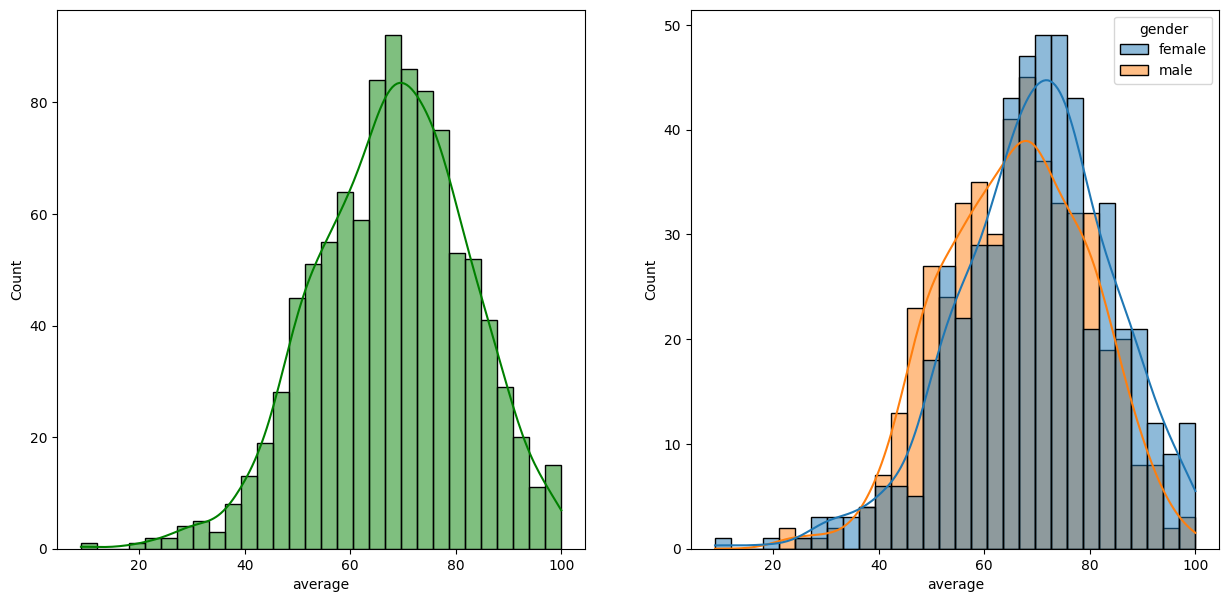

In [18]:
fig = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df,x='average',bins = 30,kde =True,color ='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde= True,hue='gender')


<Axes: xlabel='total_score', ylabel='Count'>

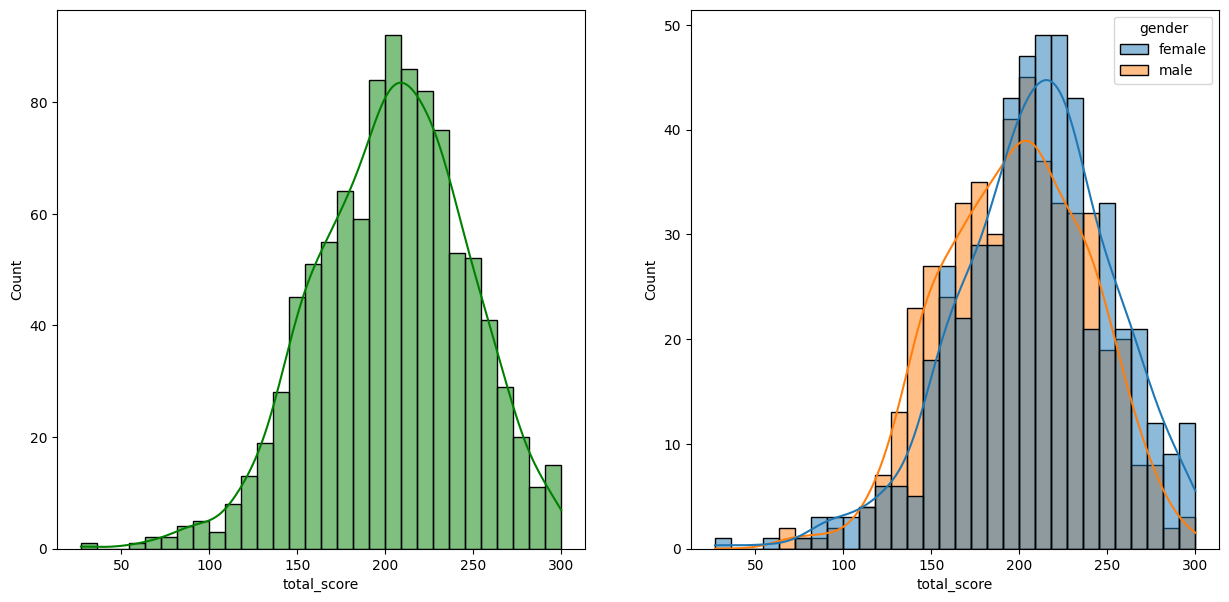

In [19]:
fig = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot(data = df , x = 'total_score',bins = 30,kde = True,color = 'g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')

Female students tend to perform well than male students

<Axes: xlabel='average', ylabel='Count'>

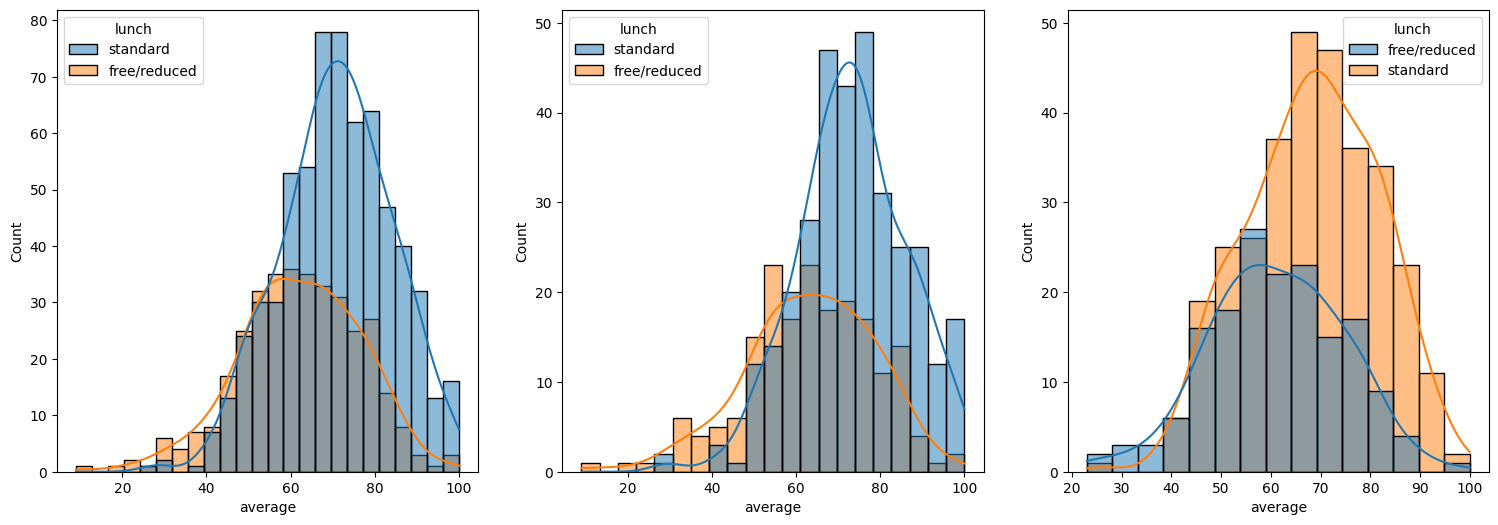

In [20]:
fig = plt.subplots(1,3,figsize = (25,6))
plt.subplot(141)
sns.histplot(data = df, x='average',kde = True,hue='lunch')
plt.subplot(142)
sns.histplot(data = df[df.gender == 'female'],x = 'average',kde = True,hue = 'lunch')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x='average',kde = 'True',hue = 'lunch')

Insight
1. Standard Lunch helps perform well in exam
2. Standard lunch helps perform well in exam be it male or female

<Axes: xlabel='average', ylabel='Count'>

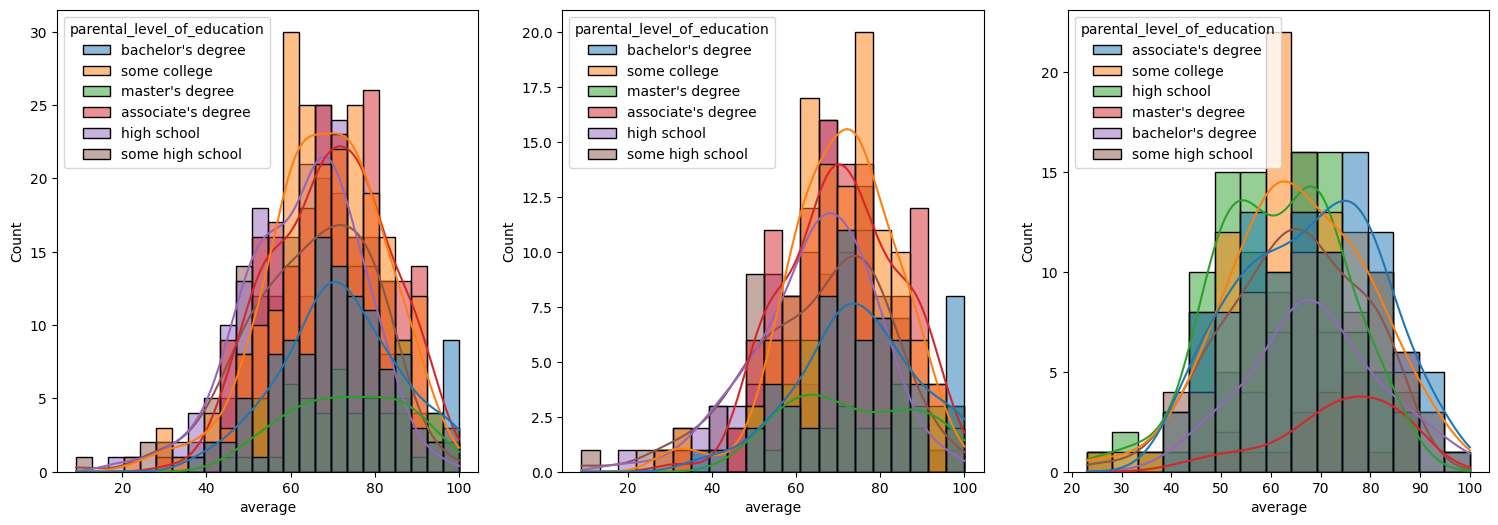

In [21]:
fig = plt.subplots(1,3,figsize =(25,6))
plt.subplot(141)
sns.histplot(data = df,x='average',kde = True, hue = 'parental_level_of_education')
plt.subplot(142)
sns.histplot(data = df[df.gender =='female'],x = 'average',kde = True, hue = 'parental_level_of_education')
plt.subplot(143)
sns.histplot(data = df[df.gender == 'male'],x='average',kde = True,hue = 'parental_level_of_education')



<Axes: xlabel='average', ylabel='Count'>

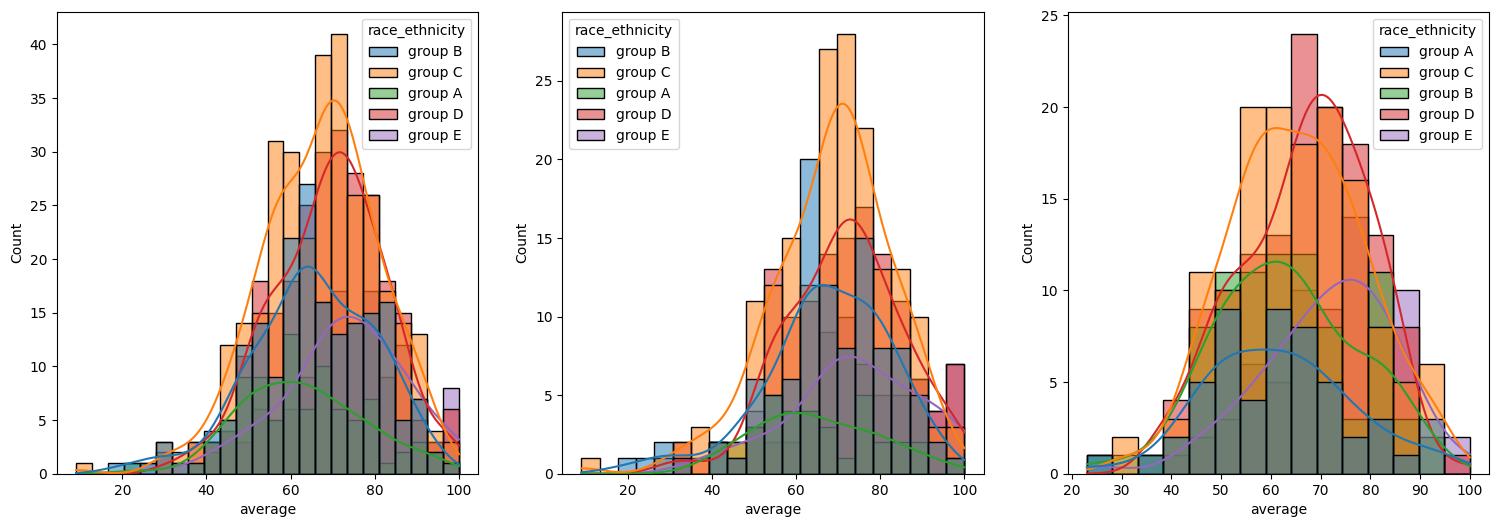

In [22]:
fig = plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = df , x = 'average', kde = True, hue = 'race_ethnicity')
plt.subplot(142)
sns.histplot(data = df[df['gender']=='female'],x = 'average',kde = True,hue = 'race_ethnicity')
plt.subplot(143)
sns.histplot(data = df[df['gender']=='male'],x = 'average',kde = True,hue='race_ethnicity')

Insights 
1. Students with group A and group B tends to perform poorly in exams
2. Students with group A and group B tends to perform poorly in exams irrespective of whether they are male or female

Maximum Score of students in all the three subjects

<Axes: title={'center': 'Writing Score'}, ylabel='writing_score'>

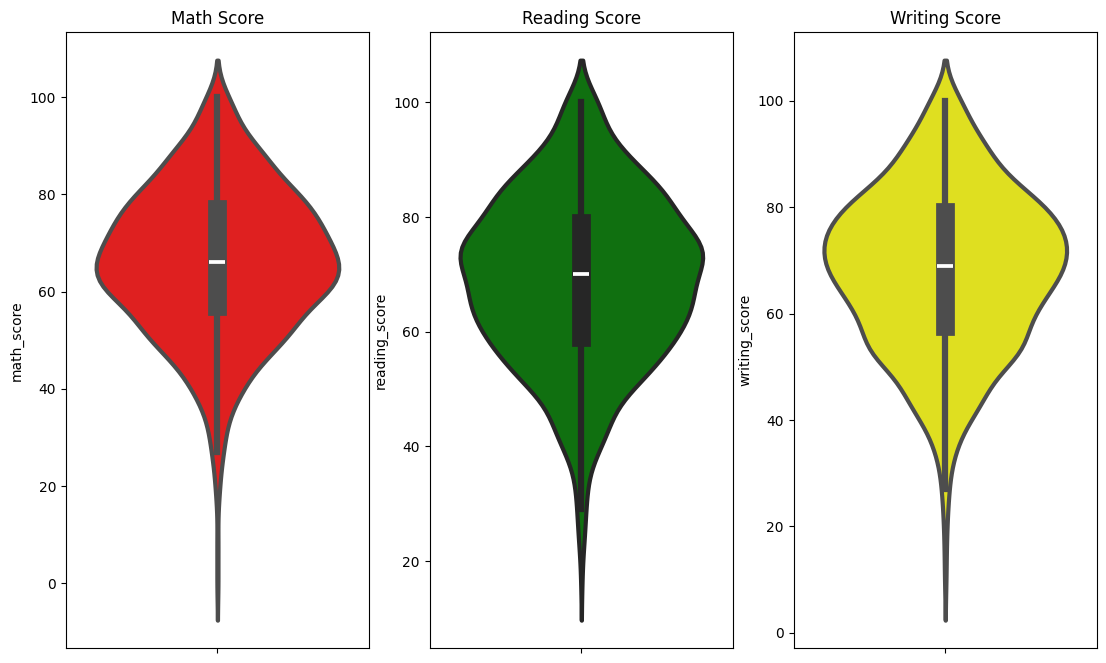

In [23]:
plt.figure(figsize = (18,8))
plt.subplot(1,4,1)
plt.title("Math Score")
sns.violinplot(data = df,y='math_score',color = 'red',linewidth = 3)
plt.subplot(1,4,2)
plt.title("Reading Score")
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Score")
sns.violinplot(y ='writing_score',data=df,color ='yellow',linewidth=3)


Insight
1. From the above graph it is clearly seen that most of the students scored in the range of 60-80 in maths whereas most of the student have scored in the range of 50-80 in reading and writing

(-1.25, 1.25, -1.25, 1.25)

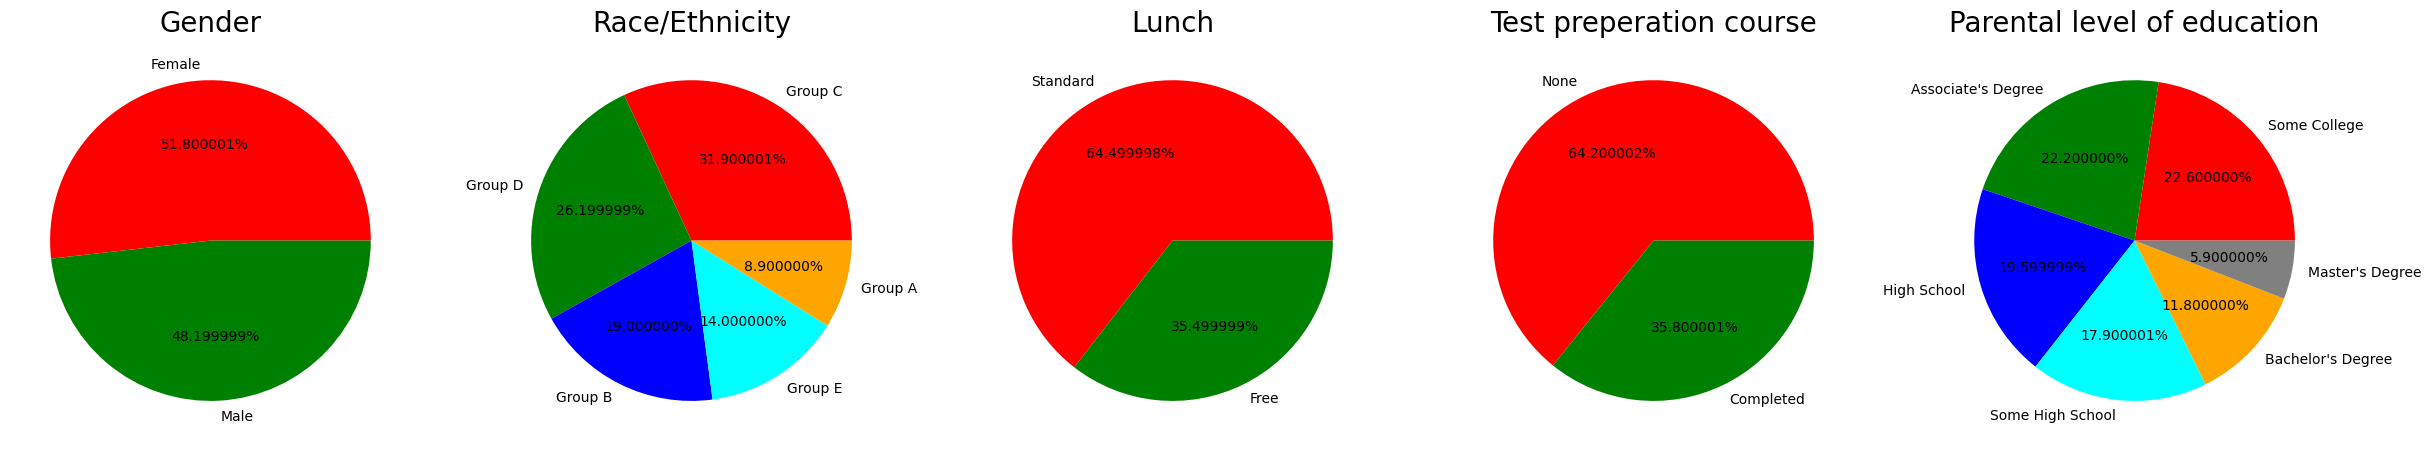

In [24]:
plt.rcParams['figure.figsize'] = (30,12)
plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors=color, labels=labels,autopct='%2f%%')
plt.title('Test preperation course',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,labels=labels,colors=color,autopct='%2f%%')
plt.title('Parental level of education',fontsize = 20)
plt.axis('off')

Insights
1. Number of male and female students are almost equal
2. Number of students are greatest in group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preperation are greater
5. Number of students whose parental education is "some college" is greater followed by "Associate's degree"

Feature Wise Vizualisation

Gender Column
1.How is the distribution of Gender
2. Does Gender have any impact on Student's performance

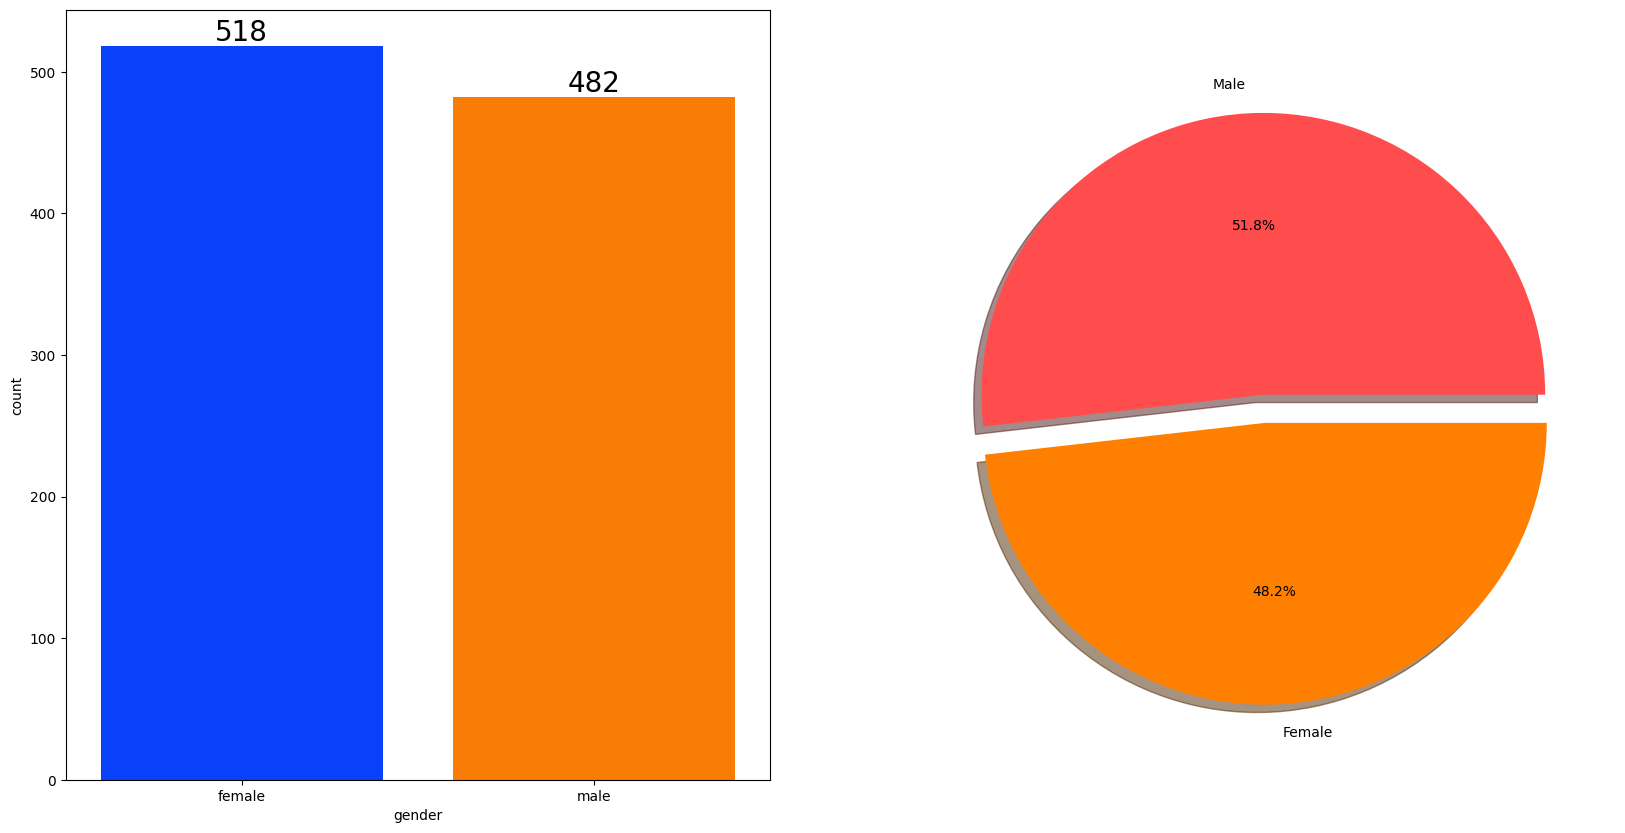

In [25]:
fig,ax = plt.subplots(1,2,figsize =(20,10))
sns.countplot(x = df['gender'],data = df,palette='bright', ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color ='black',size = 20)
plt.pie(x = df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Gender have balanced data with female students as 518 (48%) and male students as 482 (51.8%)

Bivariate Analysis - Does gender have any impact on the student's performance

In [26]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [27]:
#gender_group = df.groupby('gender').mean()
numeric_columns = df.select_dtypes(include='number').columns
gender_group = df.groupby('gender')[numeric_columns].mean()
gender_group


,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


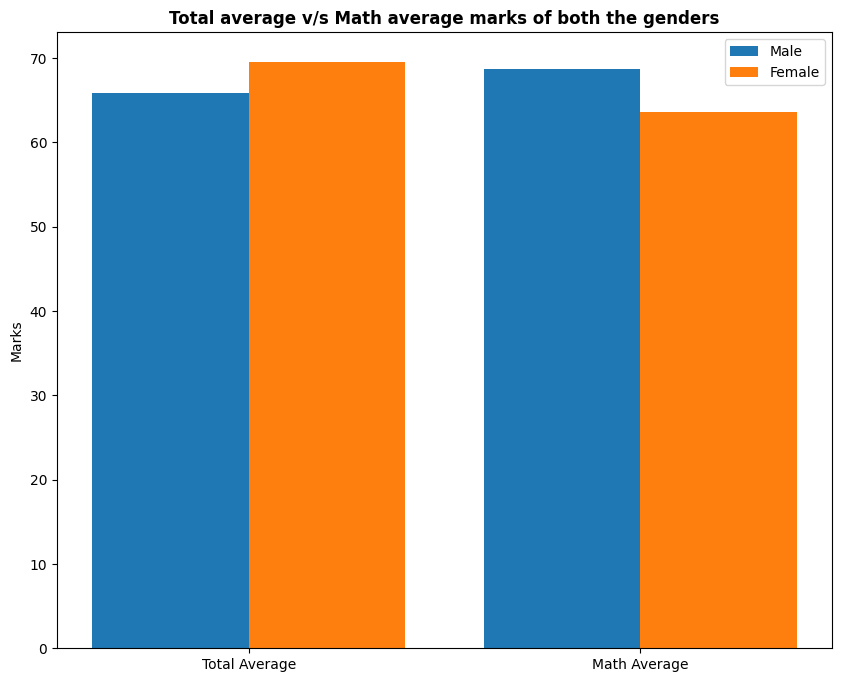

In [28]:
plt.figure(figsize=(10,8))
X = ['Total Average','Math Average']
female_score = gender_group['average'][0],gender_group['math_score'][0]
male_Score = gender_group['average'][1],gender_group['math_score'][1]
X_axis = np.arange(len(X))
plt.bar(X_axis-0.2,male_Score,0.4,label = 'Male')
plt.bar(X_axis+0.2, female_score,0.4,label = 'Female')
plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
1. On an average female has done better then male
2. Male have score more in maths than female

Race/Ethnicity Column
1. How is group by distribution
2. Is Race/Ethnicity has any impact on student's performance

Univriate Analysis (How the groups are distributed)

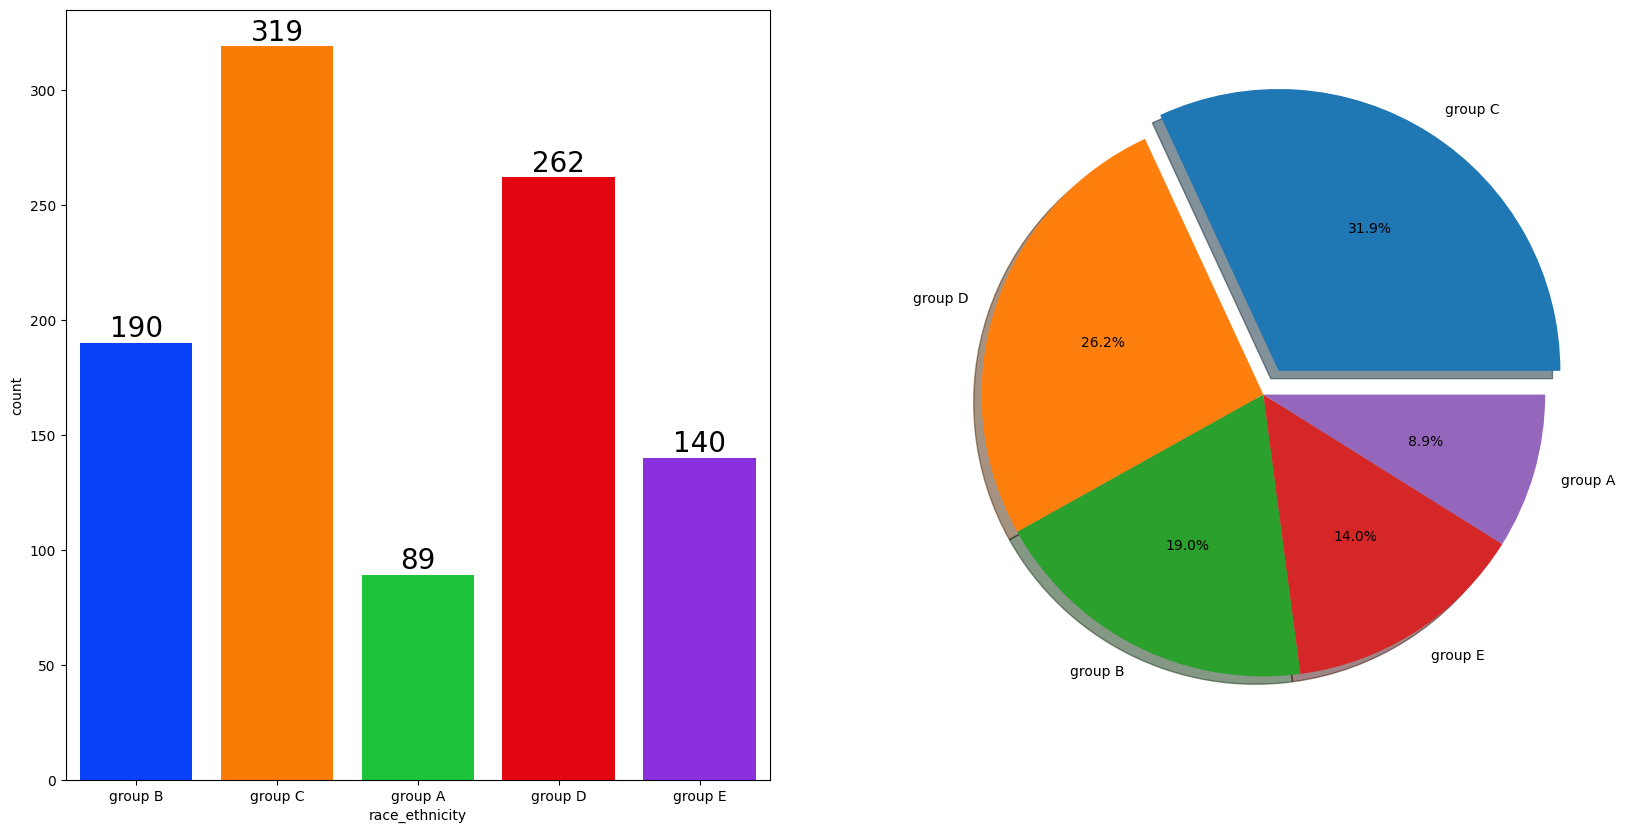

In [29]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights
1. Most of the students belong to group C/group D
2. Lowest number of students belongs to group A

Bivarite Analysis (Does Race_ethnicity has any impact on students performance?)

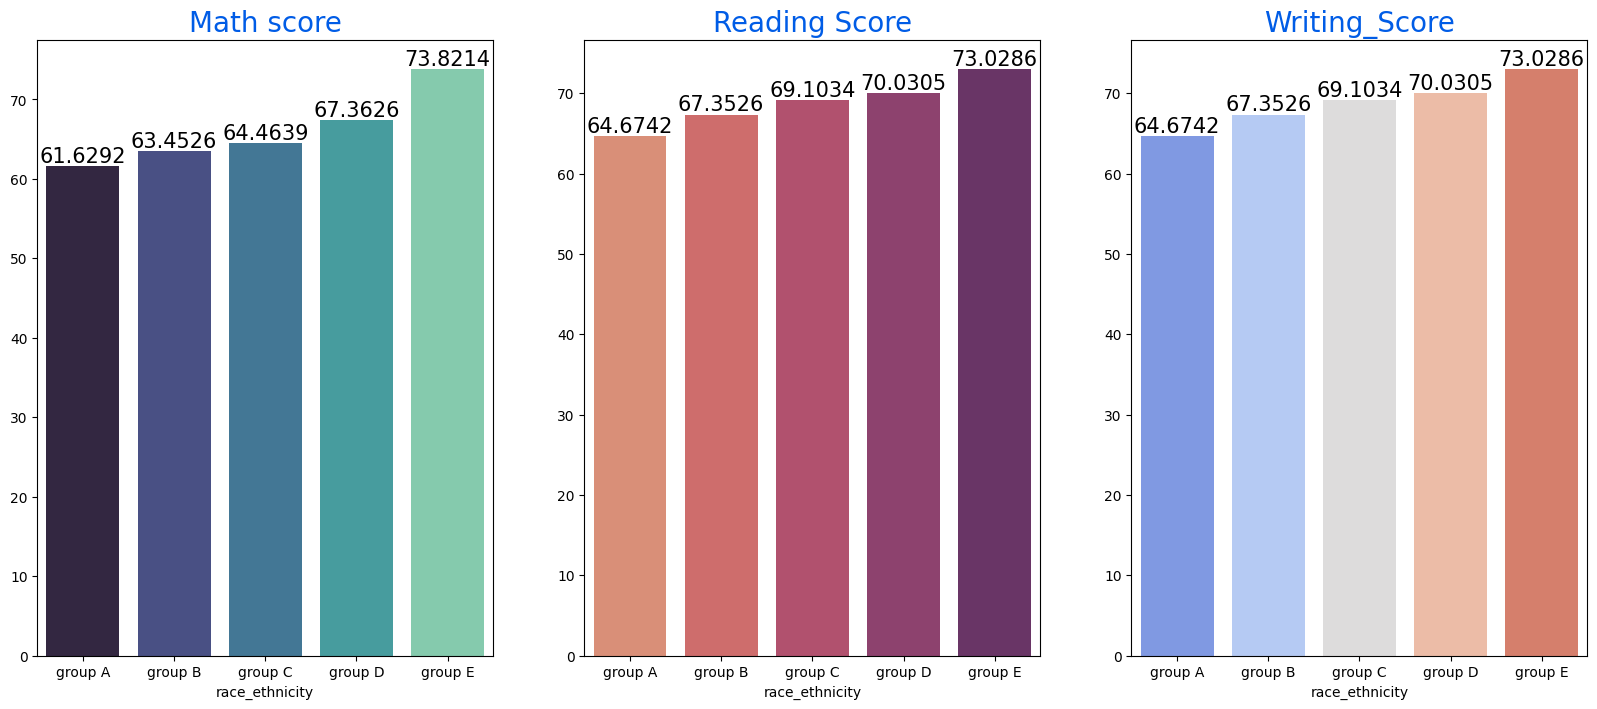

In [30]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,size = 15, color = 'black')

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading Score',color = '#005ce6',size= 20 )

for container in ax[1].containers:
    ax[1].bar_label(container,size=15,color='black')

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_Score',color = '#005ce6',size = 20)

for container in ax[2].containers:
    ax[2].bar_label(container,size=15,color='black')

Insights 
1. Group E have scored highest in all the subjects 
2. Group A have scored lowest in all the subjects
3. Students with lower socioeconomic status have lower average in all the subjects

Parental level of education
1. What is the educationl background of student's parent
2. Does parental education has any impact on student's performance?

Univriate Analysis  - 
What is the educational background of student's parents 

Text(0, 0.5, 'Count')

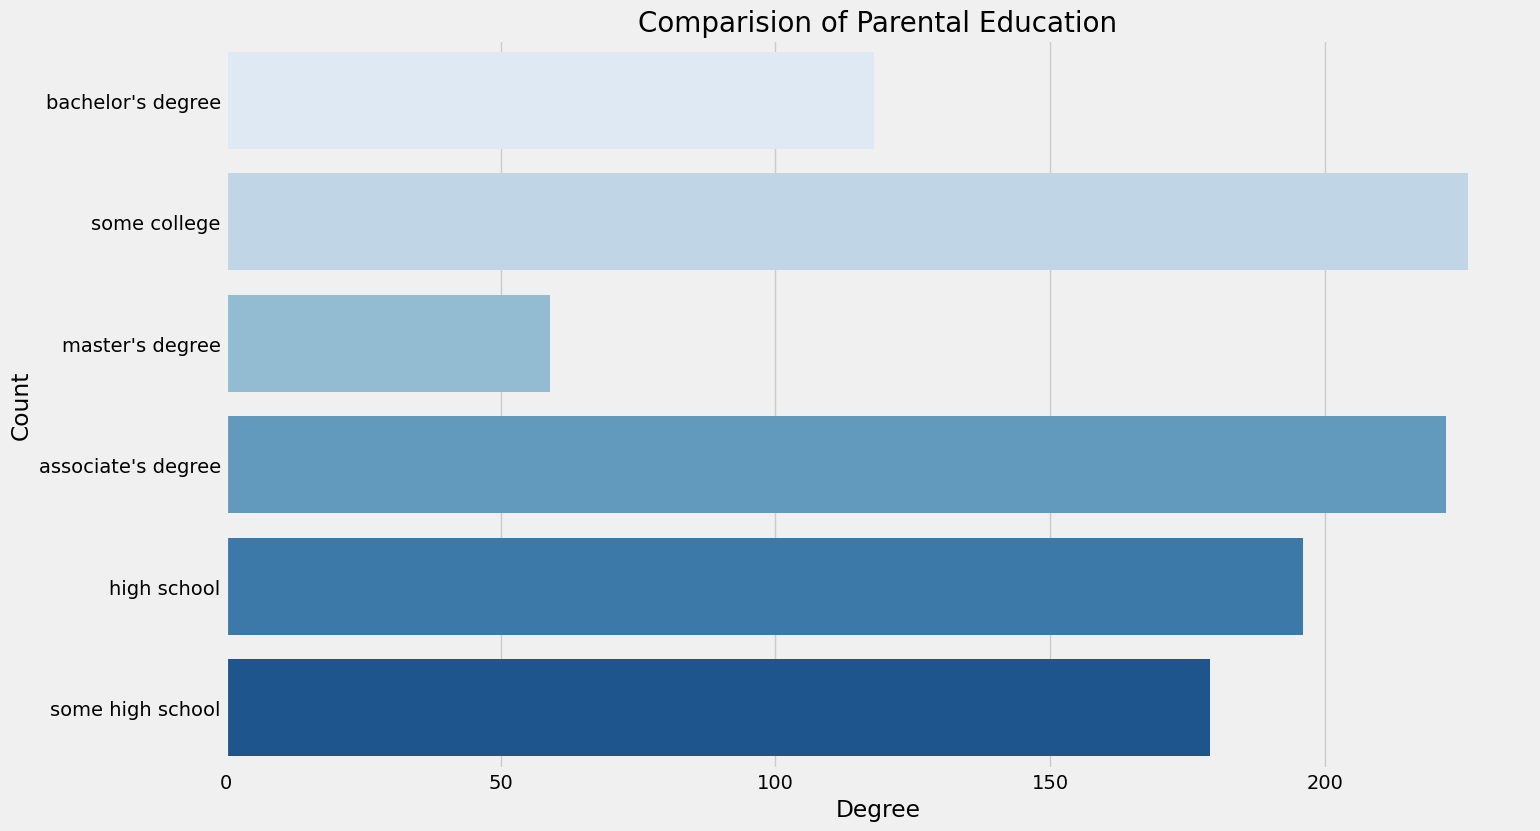

In [38]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'],palette='Blues')
plt.title('Comparision of Parental Education',fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('Count')

Insight -
Largest Number of parents are from some college

Bivariate Analysis - ( Does parental education has any impact on student's performance ? )

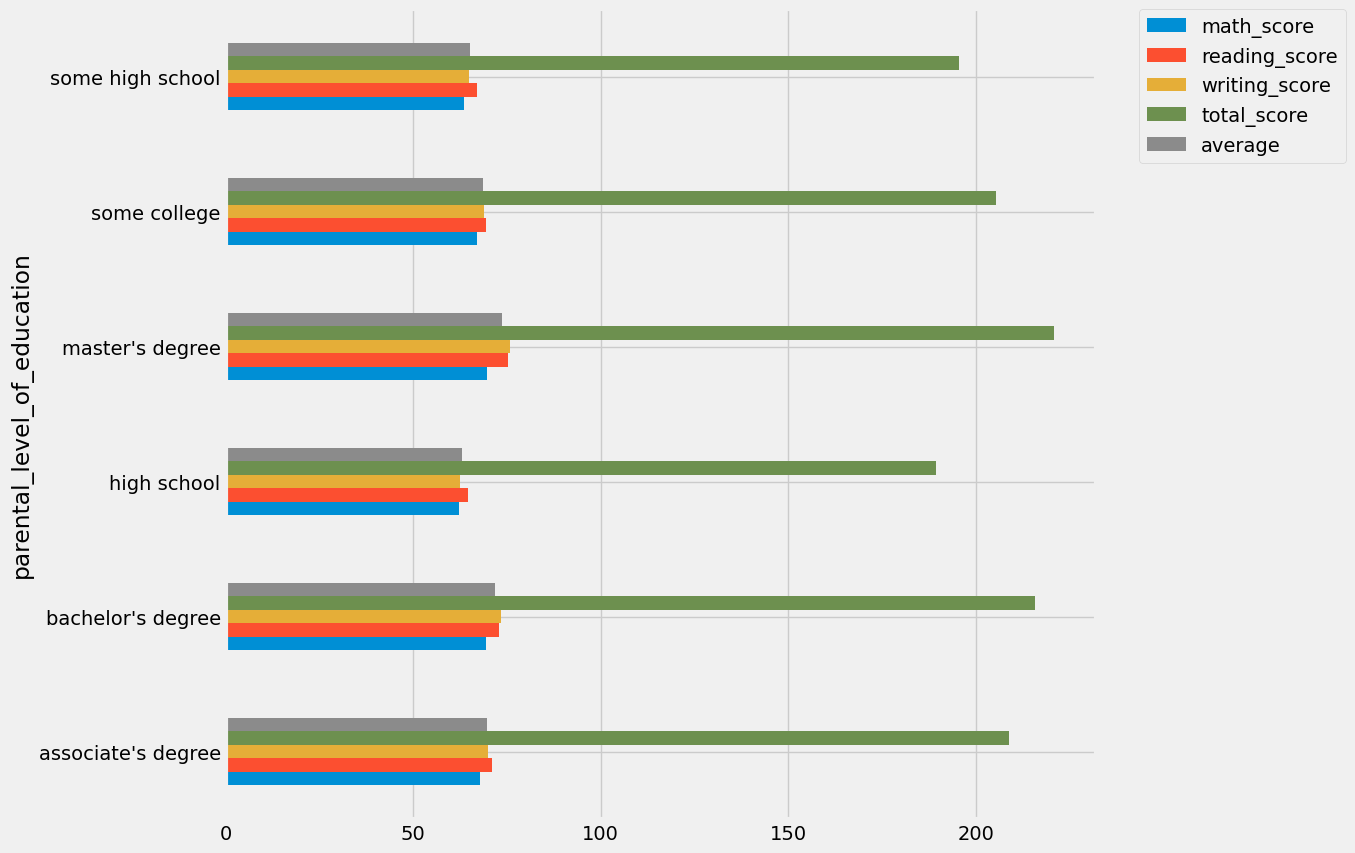

In [53]:
numeric_columns = df.select_dtypes(include='number').columns
group_data3 = df.groupby('parental_level_of_education')[numeric_columns].mean()
group_data3
group_data3.plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.show()


Insights - 
1. The score of student whose parents possess master and bachelor level education are higher than others.